In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [46]:
bikes = pd.read_csv('hour.csv')
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [47]:
bikes_prep = bikes.copy()

In [48]:
bikes_prep = bikes_prep.drop(['index','date','casual', 'registered'],axis=1)

In [49]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


# To Check missing values

In [50]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

#values through histogram

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

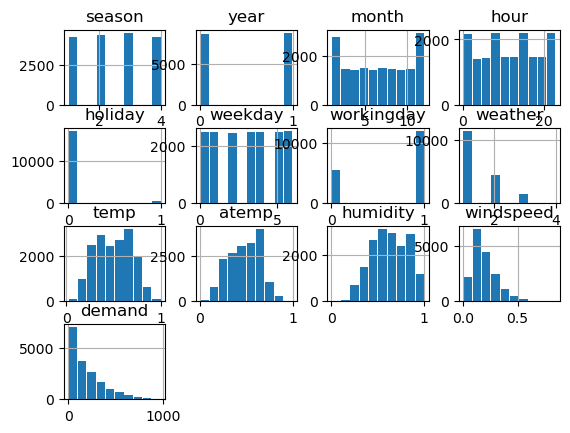

In [51]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout

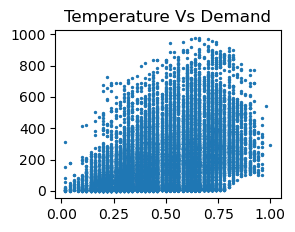

In [52]:
plt.subplot(2, 2, 1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=2)

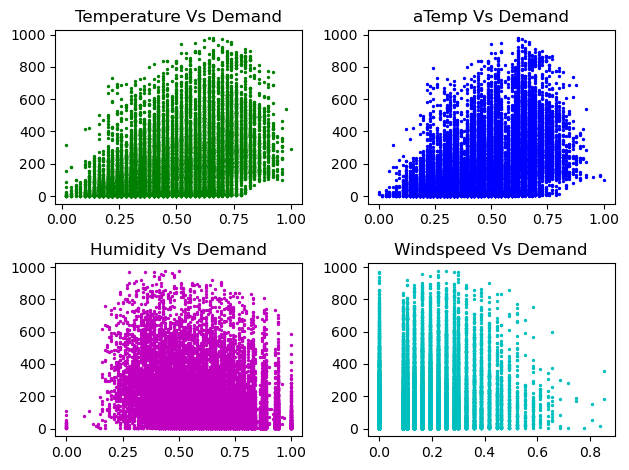

In [53]:
plt.subplot(2, 2, 1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=2, c='g')

plt.subplot(2, 2, 2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=2, c='b')

plt.subplot(2, 2, 3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=2, c='m')

plt.subplot(2, 2, 4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=2, c='c')

plt.tight_layout()


#Plot the categorical Features

In [54]:
cat_list = bikes_prep['season'].unique()
cat_average=bikes_prep.groupby('season').mean()['demand']

<BarContainer object of 4 artists>

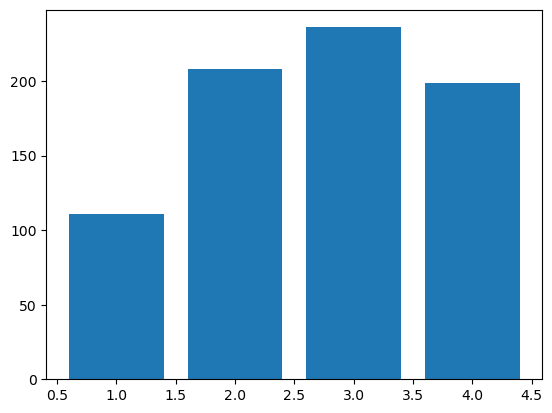

In [55]:
plt.bar(cat_list, cat_average)

<BarContainer object of 4 artists>

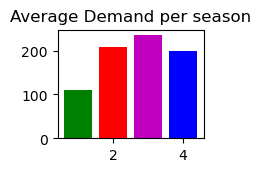

In [56]:
plt.subplot(3,3,1)
plt.title('Average Demand per season')

cat_list = bikes_prep['season'].unique()

cat_average=bikes_prep.groupby('season').mean()['demand']

colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list, cat_average, color=colors)

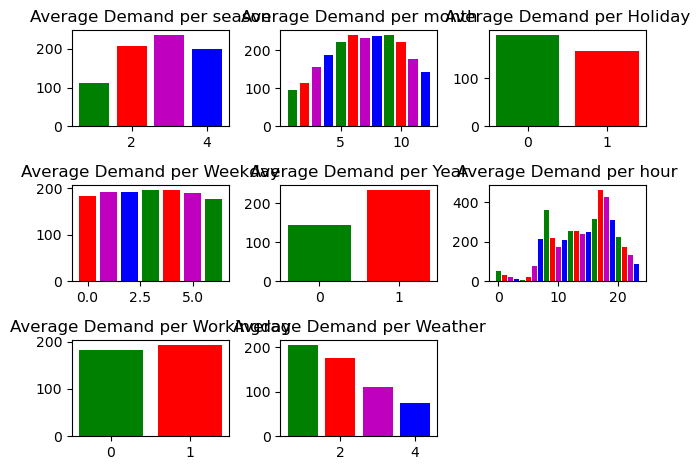

In [57]:
colors = ['g', 'r', 'm', 'b']

plt.subplot(3, 3, 1)
plt.title('Average Demand per season')
cat_list = bikes_prep['season'].unique()
cat_average=bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)


plt.subplot(3, 3, 2)
plt.title('Average Demand per month')
cat_list = bikes_prep['month'].unique()
cat_average=bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3, 3, 3)
plt.title('Average Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average=bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3, 3, 4)
plt.title('Average Demand per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average=bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3, 3, 5)
plt.title('Average Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average=bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3, 3, 6)
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average=bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3, 3, 7)
plt.title('Average Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average=bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3, 3, 8)
plt.title('Average Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average=bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()

# Check For Outliers


In [58]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [59]:
bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

# Multilinearity using corelation coeffecient

In [60]:
correlation = bikes_prep[['temp','atemp','windspeed','humidity','demand']].corr()

In [61]:
correlation

,temp,atemp,windspeed,humidity,demand
temp,1.000000,0.987672,-0.023125,-0.069881,0.404772
atemp,0.987672,1.000000,-0.062336,-0.051918,0.400929
windspeed,-0.023125,-0.062336,1.000000,-0.290105,0.093234
humidity,-0.069881,-0.051918,-0.290105,1.000000,-0.322911
demand,0.404772,0.400929,0.093234,-0.322911,1.000000


In [62]:
bikes_prep = bikes_prep.drop(['atemp','weekday','workingday','year','windspeed'],axis=1)

In [63]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


# Autocorelation in demand using acorr

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1c960b8dbd0>)

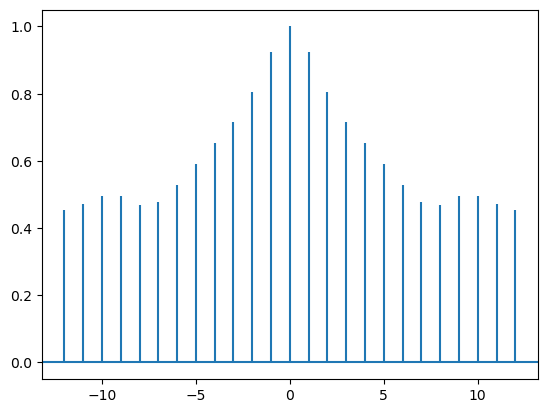

In [64]:
df1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(df1, maxlags=12)

# Log Normalise feature 'demand'

In [65]:
df1 = bikes_prep['demand']
df2 = np.log(df1)

<Axes: >

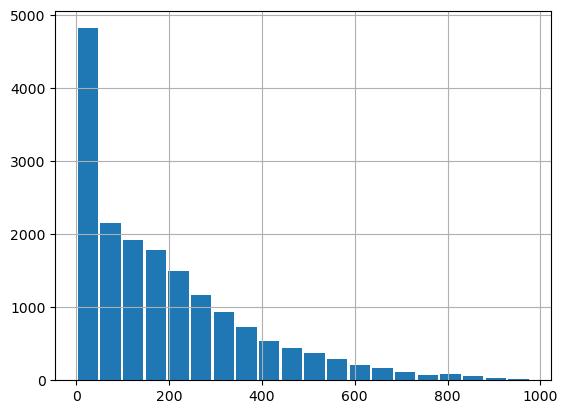

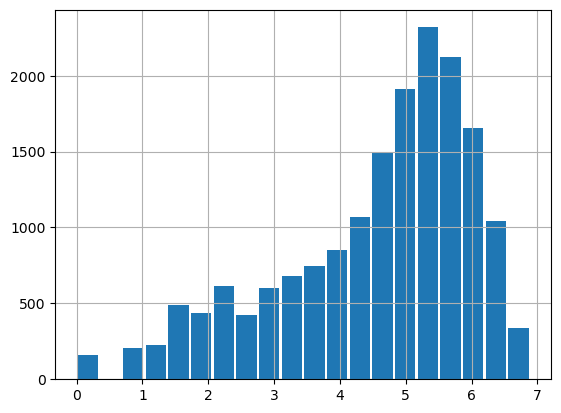

In [66]:
plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

In [67]:
bikes_prep['demand']=np.log(bikes_prep['demand'])

In [68]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123
17375,1,12,20,0,2,0.26,0.60,4.488636
17376,1,12,21,0,1,0.26,0.60,4.499810
17377,1,12,22,0,1,0.26,0.56,4.110874


In [69]:
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3], axis=1)

In [70]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [71]:
bikes_prep_lag = bikes_prep_lag.dropna()

In [72]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


# Create Dummy Variables

In [74]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [75]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

C:\Users\SHAUGARG\AppData\Local\Temp\ipykernel_24700\627775175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
C:\Users\SHAUGARG\AppData\Local\Temp\ipykernel_24700\627775175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
C:\Users\SHAUGARG\AppData\Local\Temp\ipykernel_24700\627775175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [76]:
bikes_prep_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
y = bikes_prep_lag[['demand']]
x = bikes_prep_lag.drop(['demand'],axis = 1)

In [78]:
tr_size = 0.7 * len(x)
tr_size = int(tr_size)

In [79]:
x_train = x.values[0 : tr_size] 
x_test = x.values[tr_size : len(x)]

y_train = y.values[0 : tr_size] 
y_test = y.values[tr_size : len(y)]

In [80]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(x_train,y_train)

LinearRegression()

In [81]:
r2_train = std_reg.score(x_train,y_train)
r2_test = std_reg.score(x_test,y_test)

In [82]:
y_predict = std_reg.predict(x_test)

In [83]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_predict))

In [84]:
r2_train

0.9195240591465778

In [85]:
r2_test

0.9287151360253385

In [86]:
rmse

0.38098800498170465

In [87]:
y_test_e = []
y_predict_e = []

In [88]:
for i in range(0, len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))


In [89]:
    
log_sq_sum =0.0    
    
for i in range(0, len(y_test_e)):
    log_a      = math.log(y_test_e[i] +1)
    log_p      = math.log(y_predict_e[i] +1)
    log_diff   = (log_p  - log_a)**2
    log_sq_sum = log_sq_sum + log_diff
    
    
rmsle = math.sqrt(log_sq_sum/len(y_test))

print("")
print(rmsle)


0.35609417069802113
